<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_3_0_7_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.3_0.7'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,97.735934,31.313152,92.922914,72.945056,0.253619,305.170676,304.417327,0.753349
1,0.0,1.0,42.513992,73.079565,30.496278,81.269440,-0.091758,237.267518,237.695938,-0.428420
2,0.0,2.0,20.429817,21.515283,73.832877,99.449354,0.351542,225.578874,225.433711,0.145163
3,0.0,3.0,57.898556,50.077086,52.472249,37.732825,-0.010465,208.170252,207.941748,0.228504
4,0.0,4.0,65.503540,73.346521,92.055152,58.972021,-0.027239,299.849995,299.332833,0.517162
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.185188,73.889132,32.235118,96.821475,0.131684,312.262597,311.991774,0.270823
29996,999.0,26.0,88.743433,50.787708,72.237551,57.027345,-0.150892,278.645145,278.570881,0.074264
29997,999.0,27.0,63.501977,59.452598,99.798552,91.271995,0.574686,324.599808,324.470435,0.129372
29998,999.0,28.0,98.866207,98.791854,68.805522,94.803072,1.238749,372.505404,371.504042,1.001362


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    97.735934  31.313152  92.922914  72.945056  0.253619  305.170676   
      1.0    42.513992  73.079565  30.496278  81.269440 -0.091758  237.267518   
      2.0    20.429817  21.515283  73.832877  99.449354  0.351542  225.578874   
      3.0    57.898556  50.077086  52.472249  37.732825 -0.010465  208.170252   
      4.0    65.503540  73.346521  92.055152  58.972021 -0.027239  299.849995   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   99.185188  73.889132  32.235118  96.821475  0.131684  312.262597   
      26.0   88.743433  50.787708  72.237551  57.027345 -0.150892  278.645145   
      27.0   63.501977  59.452598  99.798552  91.271995  0.574686  324.599808   
      28.0   98.866207  98.791854  68.805522  94.803072  1.238749  372.505404   
      29.0   37.435308  29.793680  62.387517  29.080068 -0.018844  168.677730   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.417327  0.753349  
      1.0    237.695938 -0.428420  
      2.0    225.433711  0.145163  
      3.0    207.941748  0.228504  
      4.0    299.332833  0.517162  
...                 ...       ...  
999.0 25.0   311.991774  0.270823  
      26.0   278.570881  0.074264  
      27.0   324.470435  0.129372  
      28.0   371.504042  1.001362  
      29.0   168.217429  0.460301  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    97.735934  31.313152  92.922914  72.945056  0.253619  305.170676   
      1.0    42.513992  73.079565  30.496278  81.269440 -0.091758  237.267518   
      2.0    20.429817  21.515283  73.832877  99.449354  0.351542  225.578874   
      3.0    57.898556  50.077086  52.472249  37.732825 -0.010465  208.170252   
      4.0    65.503540  73.346521  92.055152  58.972021 -0.027239  299.849995   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   99.185188  73.889132  32.235118  96.821475  0.131684  312.262597   
      26.0   88.743433  50.787708  72.237551  57.027345 -0.150892  278.645145   
      27.0   63.501977  59.452598  99.798552  91.271995  0.574686  324.599808   
      28.0   98.866207  98.791854  68.805522  94.803072  1.238749  372.505404   
      29.0   37.435308  29.793680  62.387517  29.080068 -0.018844  168.677730   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.417327  0.753349  
      1.0    237.695938 -0.428420  
      2.0    225.433711  0.145163  
      3.0    207.941748  0.228504  
      4.0    299.332833  0.517162  
...                 ...       ...  
999.0 25.0   311.991774  0.270823  
      26.0   278.570881  0.074264  
      27.0   324.470435  0.129372  
      28.0   371.504042  1.001362  
      29.0   168.217429  0.460301  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,97.735934,31.313152,92.922914,72.945056,0.253619,305.170676,304.417327,0.753349
1,0.0,1.0,42.513992,73.079565,30.496278,81.269440,-0.091758,237.267518,237.695938,-0.428420
2,0.0,2.0,20.429817,21.515283,73.832877,99.449354,0.351542,225.578874,225.433711,0.145163
3,0.0,3.0,57.898556,50.077086,52.472249,37.732825,-0.010465,208.170252,207.941748,0.228504
4,0.0,4.0,65.503540,73.346521,92.055152,58.972021,-0.027239,299.849995,299.332833,0.517162
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.185188,73.889132,32.235118,96.821475,0.131684,312.262597,311.991774,0.270823
29996,999.0,26.0,88.743433,50.787708,72.237551,57.027345,-0.150892,278.645145,278.570881,0.074264
29997,999.0,27.0,63.501977,59.452598,99.798552,91.271995,0.574686,324.599808,324.470435,0.129372
29998,999.0,28.0,98.866207,98.791854,68.805522,94.803072,1.238749,372.505404,371.504042,1.001362


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    97.735934  31.313152  92.922914  72.945056  0.253619  305.170676   
      1.0    42.513992  73.079565  30.496278  81.269440 -0.091758  237.267518   
      2.0    20.429817  21.515283  73.832877  99.449354  0.351542  225.578874   
      3.0    57.898556  50.077086  52.472249  37.732825 -0.010465  208.170252   
      4.0    65.503540  73.346521  92.055152  58.972021 -0.027239  299.849995   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   99.185188  73.889132  32.235118  96.821475  0.131684  312.262597   
      26.0   88.743433  50.787708  72.237551  57.027345 -0.150892  278.645145   
      27.0   63.501977  59.452598  99.798552  91.271995  0.574686  324.599808   
      28.0   98.866207  98.791854  68.805522  94.803072  1.238749  372.505404   
      29.0   37.435308  29.793680  62.387517  29.080068 -0.018844  168.677730   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    304.417327  0.753349  
      1.0    237.695938 -0.428420  
      2.0    225.433711  0.145163  
      3.0    207.941748  0.228504  
      4.0    299.332833  0.517162  
...                 ...       ...  
999.0 25.0   311.991774  0.270823  
      26.0   278.570881  0.074264  
      27.0   324.470435  0.129372  
      28.0   371.504042  1.001362  
      29.0   168.217429  0.460301  

[30000 rows x 8 columns]

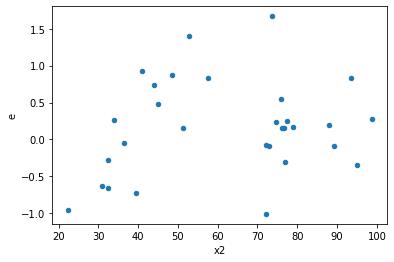

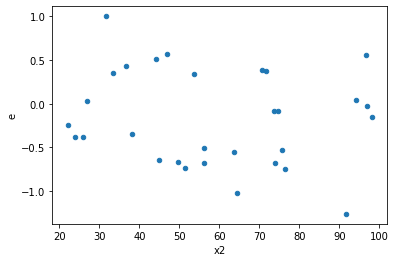

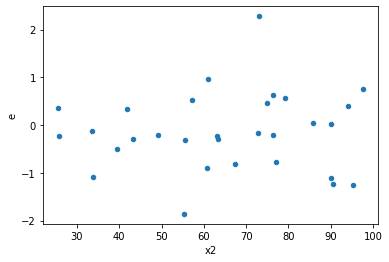

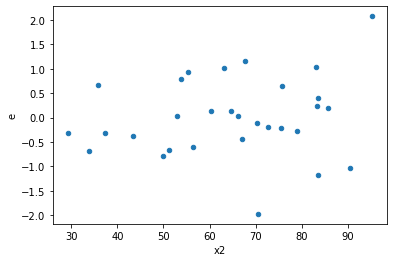

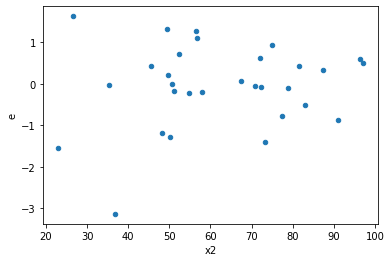

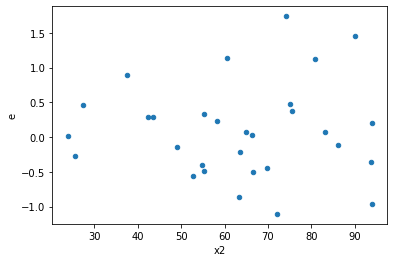

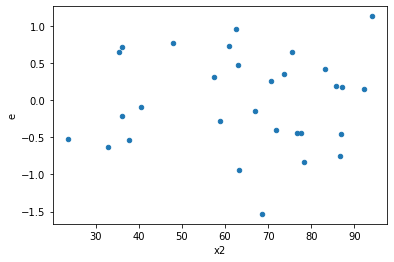

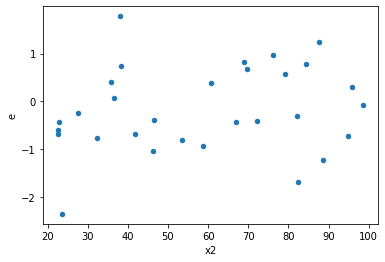

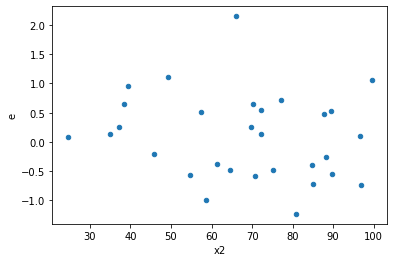

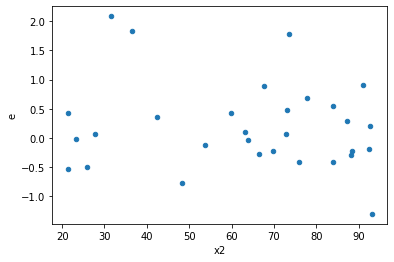

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,8.0,14.0,1.1765394773698443,6.190015791880464,0.14706743467123054,0.44214398513431885,3.0064030566843867,0.06904054032260354,0.9654797298386982,0.03452027016130177,Reject005=1 : Homoscedasticity
3.0,3.0,19.0,0.3006113441868596,12.300600502214298,0.10020378139561986,0.6474000264323315,6.460834286046523,0.006737720192732999,0.9966311399036335,0.0033688600963664994,Reject005=0 : Heteroscedasticity
4.0,10.0,12.0,3.3403088429533243,5.93839126643427,0.33403088429533245,0.4948659388695225,1.4814975564714197,0.5125857464064445,0.7437071267967778,0.25629287320322225,Reject005=1 : Homoscedasticity
6.0,9.0,13.0,2.248463705833884,3.440279439053782,0.24982930064820932,0.264636879927214,1.059270787055741,0.8969368190196112,0.5515315904901944,0.4484684095098056,Reject005=1 : Homoscedasticity
8.0,7.0,15.0,4.437775887311551,9.829761962441694,0.6339679839016501,0.6553174641627796,1.033675959675026,0.8969483345222078,0.5515258327388961,0.4484741672611039,Reject005=1 : Homoscedasticity
10.0,7.0,15.0,1.4835180033439208,7.942966592932629,0.21193114333484583,0.5295311061955086,2.4985997709589234,0.12941985051003546,0.9352900747449823,0.06470992525501773,Reject005=1 : Homoscedasticity
11.0,7.0,15.0,1.739130965988899,4.386439783497041,0.24844728085555698,0.2924293188998027,1.1770276490561238,0.7432396317900878,0.6283801841049561,0.3716198158950439,Reject005=1 : Homoscedasticity
15.0,4.0,18.0,2.2675525487227164,10.120245549283617,0.5668881371806791,0.5622358638490899,0.9917933133074075,0.8743871912838888,0.5628064043580556,0.4371935956419444,Reject005=1 : Homoscedasticity
16.0,6.0,16.0,1.9688641269402418,6.4301988705763655,0.328144021156707,0.40188742941102285,1.2247287882752533,0.6889687001199958,0.6555156499400021,0.3444843500599979,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,12.0,3.5434980727366154,3.6051238294740484,0.35434980727366155,0.30042698578950405,0.8478260171804938,0.8048245821114208,Reject005=1 : Homoscedasticity
1.0,19.0,3.0,10.985303902906763,0.20843207358672053,0.5781738896266717,0.06947735786224017,0.12016688942335647,0.0019482234871522864,Reject005=0 : Heteroscedasticity
2.0,8.0,14.0,1.1765394773698443,6.190015791880464,0.14706743467123054,0.44214398513431885,3.0064030566843867,0.06904054032260354,Reject005=1 : Homoscedasticity
3.0,3.0,19.0,0.3006113441868596,12.300600502214298,0.10020378139561986,0.6474000264323315,6.460834286046523,0.006737720192732999,Reject005=0 : Heteroscedasticity
4.0,10.0,12.0,3.3403088429533243,5.93839126643427,0.33403088429533245,0.4948659388695225,1.4814975564714197,0.5125857464064445,Reject005=1 : Homoscedasticity
5.0,16.0,6.0,9.9406678484536,1.5206303212620882,0.62129174052835,0.2534383868770147,0.40792170625266844,0.14218855194803479,Reject005=1 : Homoscedasticity
6.0,9.0,13.0,2.248463705833884,3.440279439053782,0.24982930064820932,0.264636879927214,1.059270787055741,0.8969368190196112,Reject005=1 : Homoscedasticity
7.0,8.0,14.0,3.4820100293106635,3.1003881179542105,0.43525125366383294,0.22145629413958648,0.508801048303536,0.33883511068656713,Reject005=1 : Homoscedasticity
8.0,7.0,15.0,4.437775887311551,9.829761962441694,0.6339679839016501,0.6553174641627796,1.033675959675026,0.8969483345222078,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      871
Reject005=0 : Heteroscedasticity    129
Name: Result_test, dtype: int64